### 3절. 막대 그래프

pyplot의 bar() 함수를 사용하여 막대그래프를 그릴 수 있음

> plt.bar(x, height, width=0.8, bottom=None, align='center', data=None, color='black', edgecolor='black')

수평으로 표현된 막대 그래프는 barh() 함수로 그린다

> plt.barh(x, height, width=0.8, bottom=None, align='center', data=None, color='black', edgecolor='black')

<br>

<b>[예제]</b> 

fifa20 데이터의 overall 변수는 선수의 능력치를 나타낸다. <br>
preferred_foot 변수는 선호하는 발을 의미하며, 총 2개의 범주로 이루어져 있다<br>
두 범주형 변수의 각 레벨에 속하는 데이터의 개수를 막대그래프로 나타내어라

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 

fifa20 = pd.read_csv('../../data/players_20.csv')
fifa20 = fifa20.head(1000)

In [5]:
fifa20.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
995,231521,https://sofifa.com/player/231521/exequiel-pala...,E. Palacios,Exequiel Palacios,20,1998-10-05,177,66,Argentina,River Plate,...,73+2,73+2,73+2,73+2,73+2,72+2,69+2,69+2,69+2,72+2
996,232099,https://sofifa.com/player/232099/marko-grujic/...,M. Grujić,Marko Grujić,23,1996-04-13,191,86,Serbia,Hertha BSC,...,72+2,75+2,75+2,75+2,72+2,72+2,75+2,75+2,75+2,72+2
997,237715,https://sofifa.com/player/237715/patrick-cutro...,P. Cutrone,Patrick Cutrone,21,1998-01-03,183,78,Italy,Wolverhampton Wanderers,...,49+2,46+2,46+2,46+2,49+2,47+2,45+2,45+2,45+2,47+2
998,220196,https://sofifa.com/player/220196/david-brooks/...,D. Brooks,David Brooks,21,1997-07-08,183,62,Wales,Bournemouth,...,64+2,62+2,62+2,62+2,64+2,61+2,55+2,55+2,55+2,61+2
999,228819,https://sofifa.com/player/228819/matias-vargas...,M. Vargas,Matías Vargas,22,1997-05-08,168,66,Argentina,RCD Espanyol,...,64+2,60+2,60+2,60+2,64+2,60+2,50+2,50+2,50+2,60+2


In [7]:
overall_cnt =fifa20['overall'].value_counts()
preferred_foot_cnt = fifa20['preferred_foot'].value_counts().sort_index()

In [12]:
overall_cnt

78    239
79    185
80    157
82     92
81     82
83     80
84     49
85     35
86     18
88     17
87     15
89     13
77      8
90      4
91      3
93      1
92      1
94      1
Name: overall, dtype: int64

In [11]:
preferred_foot_cnt

Left     232
Right    768
Name: preferred_foot, dtype: int64

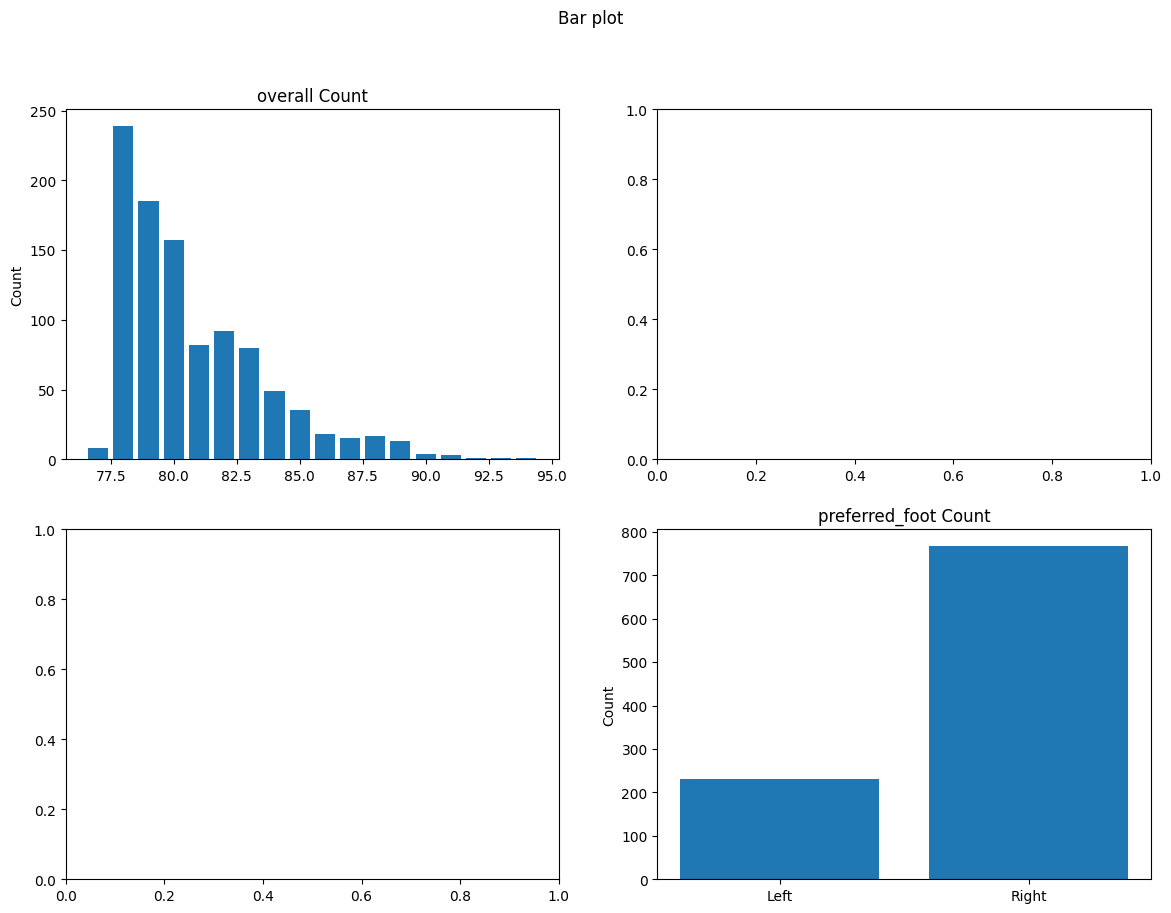

In [13]:
# 두개의 플롯을 그려야 하므로 두 개의 서브플롯을 선언
# fig는 플롯이 나타날 전체 figure, axs[n]은 n번째 서브플롯을 나타냄
fig, axs = plt.subplots(2, 2,figsize=(14,10))
fig.suptitle('Bar plot')

axs[0][0].bar(overall_cnt.index, overall_cnt.values)
axs[0][0].set_title('overall Count')
axs[0][0].set_ylabel('Count')
axs[1][1].bar(preferred_foot_cnt.index, preferred_foot_cnt.values)
axs[1][1].set_title('preferred_foot Count')
axs[1][1].set_ylabel('Count')

plt.show()

<b>[예제]</b> 여러 개의 범주형 변수를 막대그래프에 표현하기

fifa20 데이터의 overall preferred_foot 변수의 범주별 데이터 개수를 막대그래프로 한 번에 표현하고 범례를 함께 나타내기

In [14]:
import numpy as np

table = pd.crosstab(fifa20['overall'], fifa20['preferred_foot'])
table

preferred_foot,Left,Right
overall,,
77,1,7
78,51,188
79,42,143
80,33,124
81,21,61
82,20,72
83,24,56
84,11,38
85,13,22


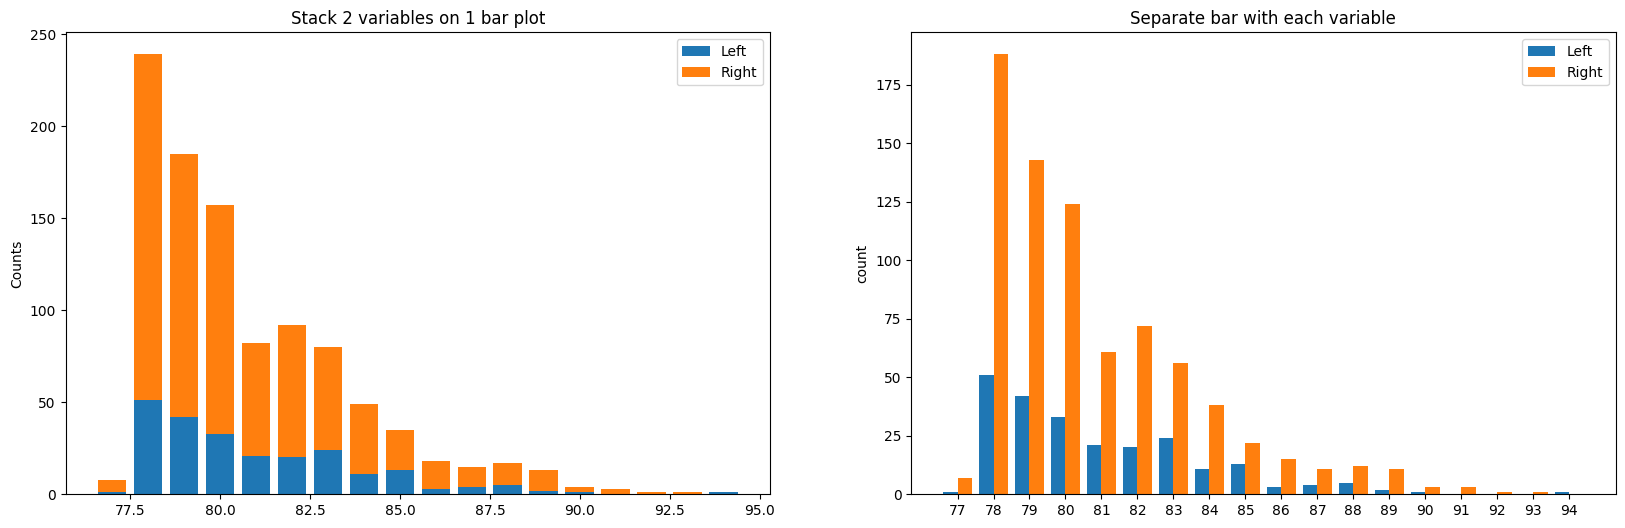

In [17]:
fig, axs = plt.subplots(1,2,figsize=(20,6))


# 두 개의 플롯을 선언하고 그 중 하나에서 bottom 인수를 사용하여 다른 값 아래에 위치하게 함

axs[0].bar(table['Left'].index, table['Left'].values, label='Left')
axs[0].bar(table['Right'].index, table['Right'].values,bottom=table['Left'].values, label='Right')

axs[0].set_ylabel('Counts')
axs[0].set_title('Stack 2 variables on 1 bar plot')
axs[0].legend()

# 범주의 개수(ind)를 세어 플롯의 x 인자에 임시 할당하고 x인자에서 두께를 감산
# 각 bar plot에 두께를 지정 

idx = table['Right'].index
ind = np.arange(1, len(idx)+1)
width = 0.4
axs[1].bar(ind - width/2, table['Left'].values, width, label='Left')
axs[1].bar(ind + width/2, table['Right'].values, width, label='Right')
axs[1].set_xticks(ind) # set_xticklabels 호출 이전에 선행해서 호출되어야 함 (눈금 고정)
axs[1].set_xticklabels(idx) # bar 플롯 x축의 범주를 문자열 값으로 변경
axs[1].set_ylabel('count')
axs[1].set_title('Separate bar with each variable')
axs[1].legend()

plt.show()

### 4절. 히스토그램

도수별 분포를 나타내는 도수분포표를 그래프로 그린 것

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;" rowspan="2">막대그래프</td>
            <td style="text-align: left;"><span style='color: #DC143C'>범주형</span>으로 구분된 변수의 범주별 데이터 수를 구한 것</td>
        </tr>
        <tr>
            <td style="text-align: left;">범주의 순서를 의도에 따라 변경 가능<td>
        </tr>
        <tr>
            <td style="text-align: left;" rowspan="2">히스토그램</td>
            <td style="text-align: left;"><span style='color: #DC143C'>연속된 수</span>를 일정한 구간으로 나눈 후 구간별 데이터의분포를 그래프로 표현한 것</td>
        </tr>
        <tr>
            <td style="text-align: left;">임의로 범주의 순서를 바꿀 수 없음<td>
        </tr>
    </table>
</div>

> plt.hist(x, bins=None, range=None, density=False, color=None, data=None)

bins : 히스토그램의 구간의 개수 정의<br>
range : bin의 상한값과 하한값 (x.min(), x.max()) 형태로 선언<br>
density : True이면 확률밀도함수를 그리고 반환

<br>

<b>[예제]</b>

fifa20 데이터의 wage_eur 변수에 대해 막대 구간의 개수를 지정하지 않은 히스토그램과 구간의 개수를 5로 지정한 히스토그램 그리기

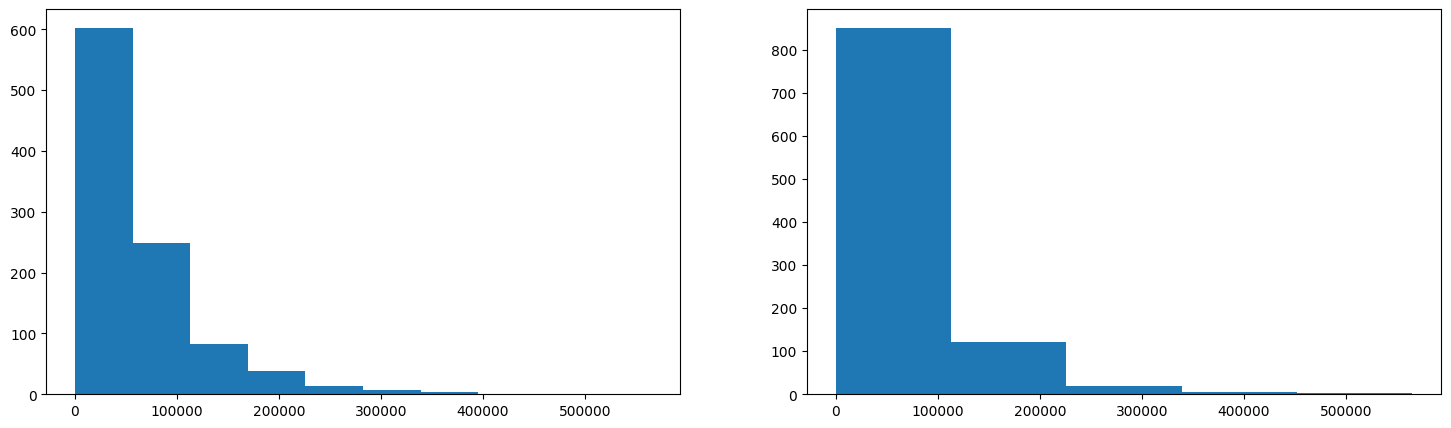

In [18]:
fig, axs = plt.subplots(1,2,figsize=(18,5))

axs[0].hist('wage_eur',data=fifa20)
axs[1].hist('wage_eur',bins=5, data=fifa20)

plt.show()

In [19]:
fifa20[['preferred_foot','height_cm','weight_kg','overall']]

,preferred_foot,height_cm,weight_kg,overall
0,Left,170,72,94
1,Right,187,83,93
2,Right,175,68,92
3,Right,188,87,91
4,Right,175,74,91
...,...,...,...,...
995,Right,177,66,77
996,Right,191,86,77
997,Right,183,78,77
998,Left,183,62,77


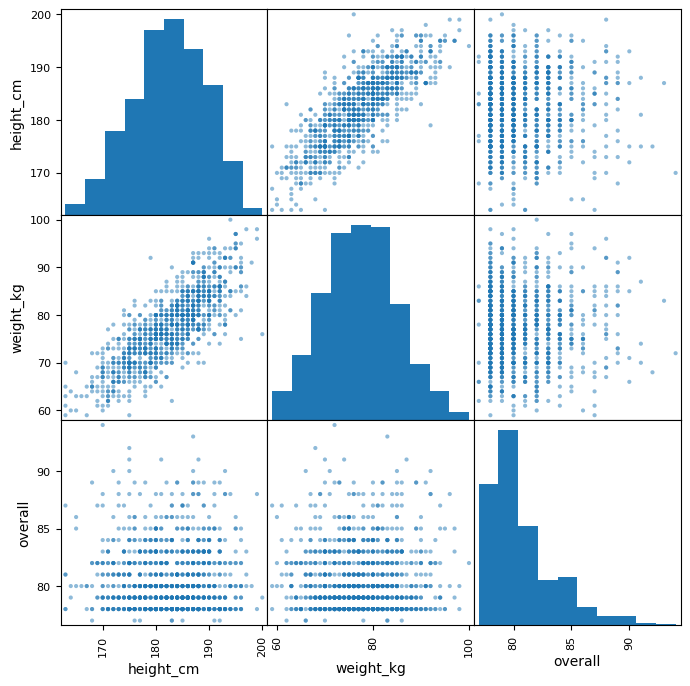

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(fifa20[['preferred_foot','height_cm','weight_kg','overall']], alpha=0.5, figsize=(8, 8), diagonal='hist')
plt.show()

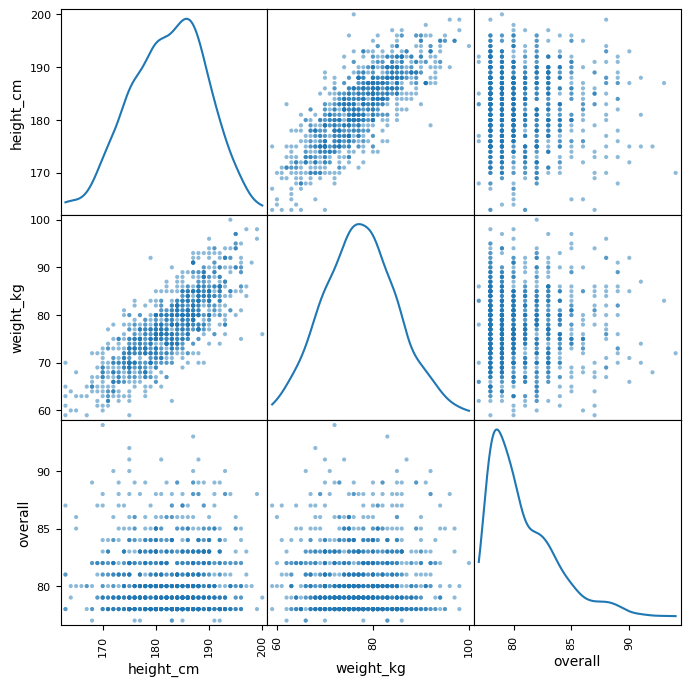

In [21]:
scatter_matrix(fifa20[['preferred_foot','height_cm','weight_kg','overall']], alpha=0.5, figsize=(8, 8), diagonal='kde') # kde = 밀도함수
plt.show()

#### 2.1 비고. matplotlib에서 축과 제목에 한글 사용하기
>from matplotlib import font_manager, rc<br>
>font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()<br>
    &emsp;<span style="color:green"># 시스템에서 기본 한글폰트를 가져와 폰트 이름 지정</span><br>
>rc('font', family=font_name)<br>
    &emsp;<span style="color:green"># rc() 함수에 한글폰트 설정</span>

malgun : 맑은고딕<br>
REFSAN : 산세리프 (한글 폰트로 변환 후 에러가 발생할 때 다시 바꿔줌)

In [ ]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)